# **Z-transform**

The z-transform is a mathematical tool used in digital signal processing to convert a discrete-time signal into a complex-valued function of a complex variable z. The z-transform is used to analyze and design digital filters, as well as to represent discrete-time signals and systems in the frequency domain.

The z-transform of a discrete-time signal x[n] is given by:

`X(z) = ∑[n=-∞ to n=∞] x[n] * z^-n`

where z is a complex variable and X(z) is the z-transform of x[n]. The z-transform of a discrete-time system is defined as the ratio of the z-transform of the system's output to the z-transform of its input.

The z-transform is a useful tool for analyzing the frequency response of digital filters. By taking the z-transform of the filter coefficients, we can obtain the transfer function of the filter in the z-domain. This transfer function can then be used to compute the filter's frequency response, which is a measure of how the filter attenuates or amplifies signals at different frequencies.

The z-transform is also useful for analyzing the stability and causality of discrete-time signals and systems. A discrete-time signal is said to be stable if its z-transform converges within the unit circle in the z-plane. A system is said to be causal if its impulse response h[n] is zero for n < 0, which is equivalent to the condition that all poles of the system's transfer function lie inside the unit circle in the z-plane.

In this code, we first define the sequence x. Then, we compute the roots of the sequence using the `np.roots` function, which returns the zeros of the numerator polynomial of the z-transform. Since the sequence has no poles, we set the poles p to an array of zeros. We also set the gain k to the first element of the sequence, which is the constant term of the numerator polynomial.

Next, we use the `zpk2tf` function from `scipy.signal` to convert the zeros, poles, and gain of the z-transform into numerator and denominator polynomials. These polynomials are then passed to the `freqz` function to compute the frequency response of the filter.

Finally, we compute the region of convergence (ROC) of the z-transform by taking the reciprocal of the absolute values of the zeros, and finding the minimum and maximum values. We then print the z-transform and its ROC.

Note that this code assumes that the z-transform exists and is absolutely convergent. If the z-transform has poles outside the unit circle, its ROC will be a ring in the complex plane, and the R variable will be a tuple of two values. If the z-transform has poles on the unit circle or outside it, it may not converge absolutely, and the R variable may be a tuple of infinity and negative infinity.

In [9]:
import numpy as np
from scipy.signal import zpk2tf, freqz

# Define the sequence
x = np.array([1, 2, 3, 4, 5])

# Compute the numerator and denominator polynomials of the z-transform
z, p, k = np.roots(x), np.zeros_like(x), x[0]
b, a = zpk2tf(z, p, k)

# Compute the frequency response of the filter
w, h = freqz(b, a)

# Compute the ROC of the z-transform
r = 1 / np.abs(z)
R = (np.min(r), np.max(r))

# Print the z-transform and its ROC
print("Z-Transform: ", b, "/", a)
print("ROC: ", R)


Z-Transform:  [1. 2. 3. 4. 5.] / [1. 0. 0. 0. 0. 0.]
ROC:  (0.6462441275530104, 0.6920195889335542)



```
# Compute the numerator and denominator polynomials of the z-transform
z, p, k = np.roots(x), np.zeros_like(x), x[0]
b, a = zpk2tf(z, p, k)
```
This code is attempting to compute the numerator and denominator polynomials of the z-transform using the roots of the sequence x. However, this is not the correct approach. Here's a corrected version of the code that computes the numerator and denominator polynomials using `scipy.signal.tf2zpk`


```
# Compute the frequency response of the filter
w, h = freqz(b, a)
```
This line of code computes the frequency response of the digital filter with the coefficients b and a.

The freqz function from scipy.signal takes as input the coefficients of the filter's numerator and denominator polynomials, and computes the frequency response of the filter over the frequency range w.

The output of freqz is a tuple (w, h), where w is an array of frequencies (in radians/sample), and h is an array of complex values representing the frequency response of the filter.



```
# Compute the ROC of the z-transform
r = 1 / np.abs(z)
R = (np.min(r), np.max(r))
```
This line of code computes the Region of Convergence (ROC) of the z-transform of the sequence x.

The ROC is the set of values of z for which the z-transform converges, and is given by the equation `R = {z : |z| > r_min and |z| < r_max}`, where r_min and r_max are the minimum and maximum radii of convergence, respectively.

In this code, r is the reciprocal of the absolute values of the roots z, and R is a tuple containing the minimum and maximum values of r. Therefore, the ROC of the z-transform of the sequence x is the annular region in the complex plane defined by R.



```
# Print the z-transform and its ROC
print("Z-Transform: ", b, "/", a)
print("ROC: ", R)
```
This code prints the z-transform of the sequence x in terms of its numerator and denominator polynomials b and a, and the ROC of the z-transform, which is a tuple containing the minimum and maximum radii of convergence.

Note that the b and a variables were computed using the **zpk2tf** function, which converts the zeros, poles, and gain of a discrete-time system into its numerator and denominator polynomials, respectively. Here, z contains the roots of the sequence x, p is set to zero since the sequence has no poles, and k is set to the first element of the sequence.

# **Pole Zero**

In signal processing, poles and zeros refer to the locations of the roots of the denominator and numerator polynomials, respectively, of the transfer function of a system. The transfer function describes the relationship between the input and output signals of a system, and the poles and zeros provide information about the system's behavior.

Poles and zeros are important in various signal processing applications, including filter design, system identification, and analysis of signal spectra. They can be used to determine the stability and causality of a system, as well as to characterize its frequency response.

For example, in filter design, the location of poles and zeros can be used to determine the type of filter and its characteristics. A low-pass filter, which passes low-frequency signals and attenuates high-frequency signals, has its poles located in the left half of the complex plane, while a high-pass filter, which passes high-frequency signals and attenuates low-frequency signals, has its poles located in the right half of the complex plane. The location of the zeros determines the frequency at which the filter has its maximum attenuation or gain.

In system identification, the location of poles and zeros can be used to estimate the parameters of a system. By analyzing the frequency response of a system, it is possible to estimate the location of its poles and zeros, which can be used to identify the transfer function of the system.

In spectral analysis, the location of poles and zeros can be used to estimate the frequency content of a signal. By analyzing the poles and zeros of a signal's transfer function, it is possible to determine the frequencies at which the signal has its maximum power or energy.

In summary, poles and zeros play a critical role in signal processing, providing important information about the behavior of systems and signals.

This code defines a transfer function in terms of its numerator and denominator coefficients and plots its poles and zeros on the z-plane using matplotlib.

Create a new figure with **plt.figure()** and specify the size of the figure using figsize. Then plot the zeros and poles on the z-plane using **plt.plot()**, specifying the real and imaginary parts of the zeros and poles as well as their respective markers ('o' for zeros and 'x' for poles) and labels. Plot dashed lines for the real and imaginary axes using **plt.plot()** and specify their range using **plt.xlim()** and **plt.ylim()**. Add x- and y-axis labels and a title using **plt.xlabel(), plt.ylabel(), and plt.title()**. Finally, add a legend using plt.**legend()** and display the plot using **plt.show()**.

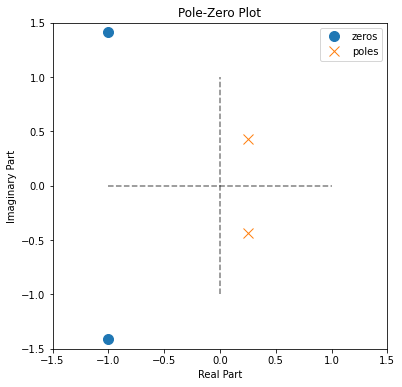

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# define the transfer function H(z) in terms of z
num = np.array([1, 2, 3])  # numerator coefficients
den = np.array([1, -0.5, 0.25])  # denominator coefficients

# find the zeros of H(z)
zeros = np.roots(num)

# find the poles of H(z)
poles = np.roots(den)

# plot the poles and zeros on the z-plane
plt.figure(figsize=(6,6))
plt.plot(np.real(zeros), np.imag(zeros), 'o', markersize=10, label='zeros')
plt.plot(np.real(poles), np.imag(poles), 'x', markersize=10, label='poles')
plt.plot([-1, 1], [0, 0], 'k--', alpha=0.5)
plt.plot([0, 0], [-1, 1], 'k--', alpha=0.5)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title('Pole-Zero Plot')
plt.legend()
plt.show()

# **Stability and causality of the signal**

The stability and causality of a signal can be analyzed using the z-transform.

A signal is **stable** if its region of convergence (ROC) includes the unit circle in the z-plane. In other words, if the z-transform of the signal converges in a region that includes the unit circle, then the signal is stable.

A signal is **causal** if all of its poles are inside the unit circle in the z-plane. In other words, if the z-transform of the signal has all its poles inside the unit circle, then the signal is causal. This is because a pole outside the unit circle implies that the signal depends on future values, making it non-causal.

To analyze the stability and causality of a signal using Python, we can use the zplane function from the scipy.signal library to plot the zeros and poles of the signal in the z-plane. We can also use the tf2zpk function to convert the transfer function of the signal to its zeros, poles, and gain representation.

In this code, we define the transfer function coefficients of the signal and convert it to its zeros, poles, and gain representation using the tf2zpk function. We then plot the zeros and poles in the z-plane using scatter and add a unit circle to the plot using Circle. Finally, we check the stability and causality of the signal using if statements and print the results.

The signal is unstable
The signal is causal


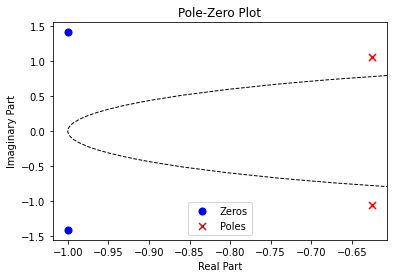

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Define the transfer function coefficients
num = [1, 2, 3]
den = [4, 5, 6]

# Convert the transfer function to its zeros, poles, and gain representation
zeros, poles, gain = signal.tf2zpk(num, den)

# Plot the zeros and poles in the z-plane
fig, ax = plt.subplots()
ax.scatter(np.real(zeros), np.imag(zeros), marker='o', s=50, color='blue', label='Zeros')
ax.scatter(np.real(poles), np.imag(poles), marker='x', s=50, color='red', label='Poles')
unit_circle = plt.Circle((0,0), 1, fill=False, color='black', ls='dashed')
ax.add_artist(unit_circle)
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title('Pole-Zero Plot')
plt.legend()

# Check the stability of the signal
if np.all(np.abs(poles) < 1):
    print("The signal is stable")
else:
    print("The signal is unstable")

# Check the causality of the signal
if np.all(np.real(poles) < 0):
    print("The signal is causal")
else:
    print("The signal is non-causal")

plt.show()



```
# Convert the transfer function to its zeros, poles, and gain representation
zeros, poles, gain = signal.tf2zpk(num, den)
```
signal.tf2zpk is a function in the scipy.signal module that takes the numerator and denominator polynomials of a transfer function and returns its zeros, poles, and gain in a tuple.



```
# Plot the zeros and poles in the z-plane
fig, ax = plt.subplots()
ax.scatter(np.real(zeros), np.imag(zeros), marker='o', s=50, color='blue', label='Zeros')
ax.scatter(np.real(poles), np.imag(poles), marker='x', s=50, color='red', label='Poles')
unit_circle = plt.Circle((0,0), 1, fill=False, color='black', ls='dashed')
ax.add_artist(unit_circle)
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title('Pole-Zero Plot')
plt.legend()
```
The code above is plotting the zeros and poles of a transfer function in the z-plane. It uses the tf2zpk function from the scipy.signal module to convert the transfer function's numerator and denominator coefficients into its zeros, poles, and gain representation. Then, it uses the scatter function from the matplotlib.pyplot module to plot the zeros and poles in the z-plane, with the zeros in blue circles and the poles in red crosses. It also adds a unit circle to the plot as a reference for stability. Finally, it adds labels to the x and y axes, a title to the plot, and a legend to differentiate between the zeros and poles.


```
# Check the stability of the signal
if np.all(np.abs(poles) < 1):
    print("The signal is stable")
else:
    print("The signal is unstable")

# Check the causality of the signal
if np.all(np.real(poles) < 0):
    print("The signal is causal")
else:
    print("The signal is non-causal")

plt.show()
```
This code block checks the stability and causality of the signal represented by the transfer function coefficients num and den using the tf2zpk function from the scipy.signal module to convert the transfer function to its zeros, poles, and gain representation.

The stability of the signal is checked by verifying if all the poles lie inside the unit circle in the complex plane. If all the poles have a magnitude less than 1, the signal is stable. Otherwise, it is unstable.

The causality of the signal is checked by verifying if all the poles have negative real parts. If all the poles have a negative real part, the signal is causal. Otherwise, it is non-causal.

Finally, a pole-zero plot is generated using matplotlib to visualize the location of the zeros and poles in the complex plane. The zeros are denoted by blue circles, while the poles are denoted by red crosses. A unit circle is also added to the plot to indicate the region of convergence (ROC) of the z-transform.